In [37]:
# imports modules required for reading & analyzing data
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [38]:
# assigns umbrella parameters to create larger, higher-quality plots
plt.rcParams['figure.figsize'] = 15,7.5
plt.rcParams['font.size'] = 20

In [39]:
# creates 'quick code' function to read the .csv file 
car_data = pd.read_csv('jeep_vs_subaru.csv', delimiter=',', nrows=30)

In [40]:
def drop_unnamed(dataframe):
    r"""
    Data pre-processing for my own dataset.
    """
    # go through all columns and drop if "unnamed" is part of label.
    for num in range(len(dataframe.columns)):
        try:
            dataframe = dataframe.drop(columns='Unnamed: %i'%(num))
        except:
            pass        
    return dataframe

In [41]:
car_data = drop_unnamed(car_data)
car_data.columns

Index(['state', 'carmax_location', 'zip_code', 'jeep_odometer_miles',
       'jeep_asking_price', 'subaru_odometer_miles', 'subaru_asking_price'],
      dtype='object')

In [42]:
# prints dataframe
car_data.sort_values(by=['subaru_odometer_miles'])

,state,carmax_location,zip_code,jeep_odometer_miles,jeep_asking_price,subaru_odometer_miles,subaru_asking_price
26,new_mexico,albuquerque,87113,119453,7990,68916,11391
14,utah,salt_lake,84095,113094,7995,81449,8500
29,new_jersey,maple_shade,8502,85492,7995,81900,8999
2,colorado,colorado_springs,80922,151195,7195,84990,11719
16,conneticut,harford,6120,100432,7295,85482,8500
25,alabama,mobile,36606,92438,8995,93400,8895
28,virginia,harrisonburg,22801,83672,7937,93867,11624
19,iowa,des_moines,50322,76785,9950,94230,9999
21,california,irvine,92618,99462,8995,95000,10500
7,new_york,albany,12205,106647,10995,95641,10995


In [43]:
# reads only the columns defined within brackets
car_data[['state', 'jeep_odometer_miles', 'jeep_asking_price']]

,state,jeep_odometer_miles,jeep_asking_price
0,oregon,113373,8999
1,maine,107775,6997
2,colorado,151195,7195
3,minnesota,117198,7999
4,north_carolina,101658,8135
5,ohio,81057,8495
6,nevada,98135,8995
7,new_york,106647,10995
8,washington,86345,8988
9,georgia,102879,6998


In [44]:
# Prints series of objects instead of entire Data Frame
car_data.jeep_odometer_miles

0     113373
1     107775
2     151195
3     117198
4     101658
5      81057
6      98135
7     106647
8      86345
9     102879
10    114006
11     87606
12    114636
13    114221
14    113094
15    123001
16    100432
17    117194
18    113549
19     76785
20     87804
21     99462
22    123001
23    114221
24     92790
25     92438
26    119453
27     99690
28     83672
29     85492
Name: jeep_odometer_miles, dtype: int64

In [45]:
### Searches dataset for specific criteria within:
### 1) .column_name == (here: state)
### 2) 'search_criteria' (here: california)
car_data[car_data.state == 'california']

,state,carmax_location,zip_code,jeep_odometer_miles,jeep_asking_price,subaru_odometer_miles,subaru_asking_price
21,california,irvine,92618,99462,8995,95000,10500


# Preliminary Investigation into dataset

## Plot miles/price relationship

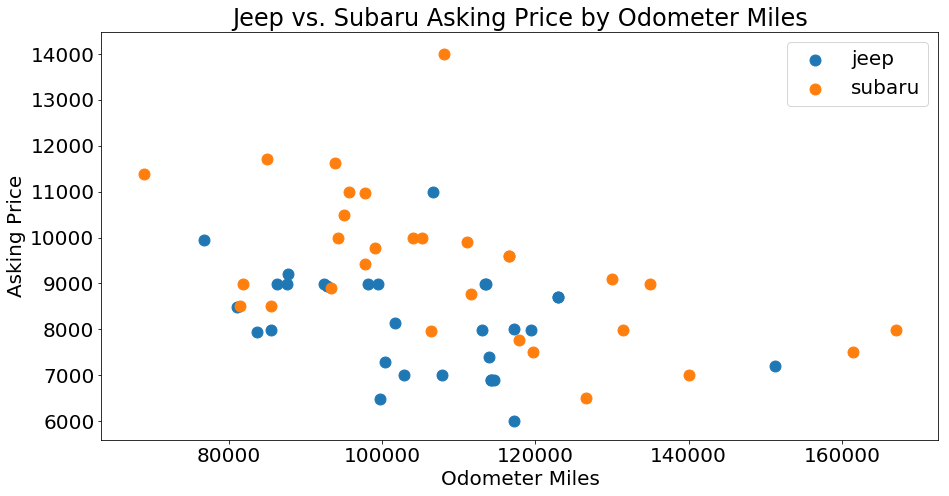

In [46]:
# assign variables according to columns in the car_data set
jeep_miles = car_data['jeep_odometer_miles']
jeep_price = car_data['jeep_asking_price']

subaru_miles = car_data['subaru_odometer_miles']
subaru_price = car_data['subaru_asking_price']

# plot a scatter plot
plt.scatter(jeep_miles, jeep_price, s=120, label='jeep')
plt.scatter(subaru_miles, subaru_price, s=120, label='subaru')
plt.legend()

plt.title('Jeep vs. Subaru Asking Price by Odometer Miles')
plt.xlabel('Odometer Miles')
plt.ylabel('Asking Price')

plt.show()

# Histograms 

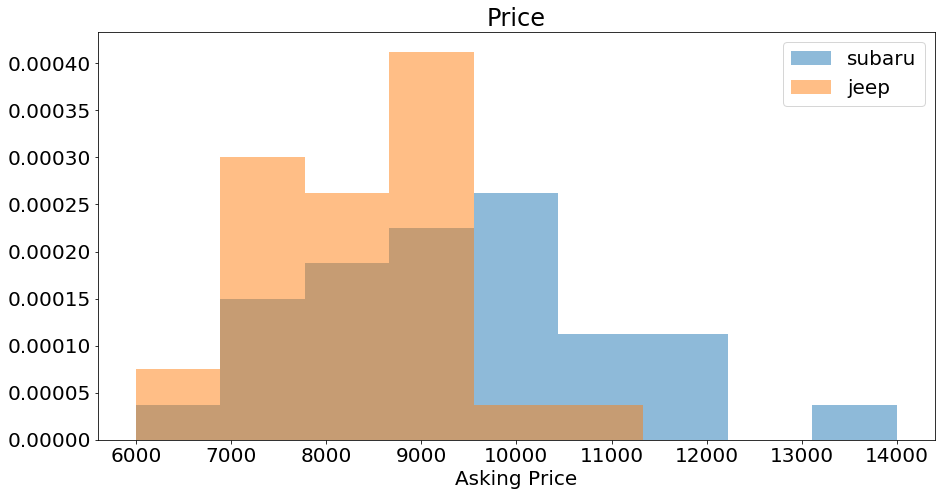

In [50]:
# create a histogram that groups ('bins') the Jeep vs. Subaru according to price
nbins = 10
prices = np.concatenate((subaru_price, jeep_price))
mn, mx = np.min(prices), np.max(prices)
my_bins = np.linspace(mn, mx, nbins)
plt.hist(subaru_price, bins=my_bins, alpha=0.5, label='subaru', density=True)
plt.hist(jeep_price, bins=my_bins, alpha=0.5, label='jeep', density=True)

plt.xlabel('Asking Price')
plt.legend()
plt.title('Price')

plt.show()

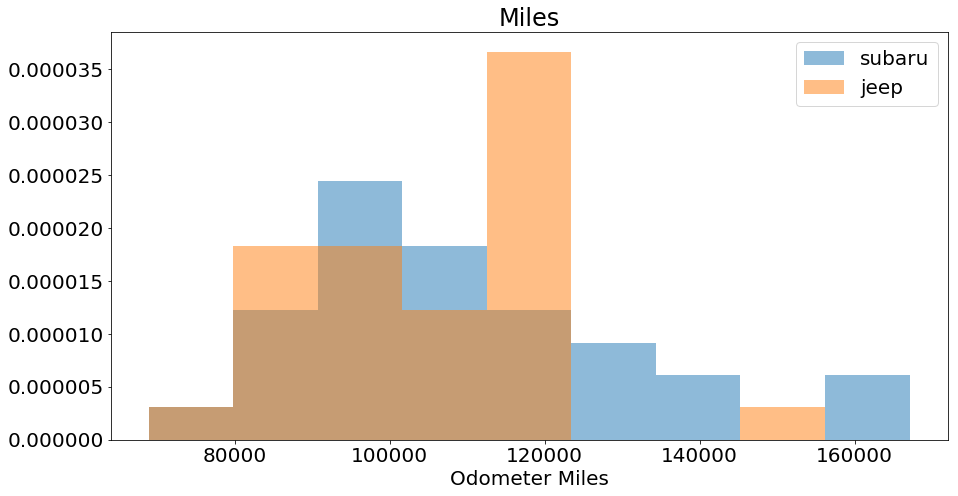

In [51]:
# create a histogram that groups ('bins') Jeep vs. Subaru according to miles
nbins = 10
miles = np.concatenate((subaru_miles, jeep_miles))
mn, mx = np.min(miles), np.max(miles)
my_bins = np.linspace(mn, mx, nbins)
plt.hist(subaru_miles, bins=my_bins, alpha=0.5, label='subaru', density=True)
plt.hist(jeep_miles, bins=my_bins, alpha=0.5, label='jeep', density=True)

plt.xlabel('Odometer Miles')
plt.legend()
plt.title('Miles')

plt.show()

# Analysis

## Fit Distributions


In [52]:
import scipy.stats.distributions as dist

In [53]:
subaru_miles.to_numpy().reshape(-1,1).shape

(30, 1)

In [54]:
def vandermond_matrix(data):
    # if data is 1D, reshape it. 
    num_data_points = data.shape[0]
    A = np.column_stack( (np.ones(num_data_points), data))
    return A

In [74]:
ragazzo = np.column_stack(car_data)
ragazzo

array([['state', 'carmax_location', 'zip_code', 'jeep_odometer_miles',
        'jeep_asking_price', 'subaru_odometer_miles',
        'subaru_asking_price']], dtype='<U21')

In [55]:
subaru_miles = subaru_miles.to_numpy()

In [56]:
subaru_design_matrix = vandermond_matrix(subaru_miles)
jeep_design_matrix = vandermond_matrix(jeep_miles)

## Problem
$$
y = Ax
$$

where $A$ is the design matrix. $y$ is the thing you are trying to predict ("data") (price)

Regression: the "best" is given by the least squares solution. 

Numpy has an implementation already. `numpy.pinv`

In [57]:
subaru_price.to_numpy()
# subaru_design_matrix

array([ 9900,  9995, 11719, 10979,  9780, 13998,  6995, 10995,  9995,
        7761,  7500,  8777,  8999,  7498,  8500,  9588,  8500,  7988,
        6500,  9999,  9094, 10500,  9588,  7975,  9419,  8895, 11391,
        7995, 11624,  8999])

In [58]:
# the way we ordered this... first is intercept, second is slope. (y = b + mx)
def model_coeffs(design_matrix, signal):
    return np.linalg.pinv(design_matrix)@signal # 'pinv' is a pseudo inverse

subaru_coeffs = model_coeffs(subaru_design_matrix, subaru_price.to_numpy() )
jeep_coeffs = model_coeffs(jeep_design_matrix, jeep_price.to_numpy() )


In [59]:
# miles defined earlier.
plot_resolution = 1000
mn, mx = np.min(miles), np.max(miles)
miles_driven = np.linspace(mn, mx, plot_resolution)

In [60]:
print(subaru_coeffs, jeep_coeffs) 
# discover how to compare the slopes through a normal distriubution to determine if there is a stat. sig. dif between
# do not train regression models (lines) on 100% data, instead do on ~70% and then test regression using the remaining

[ 1.34946674e+04 -3.76421516e-02] [ 1.09388649e+04 -2.64714889e-02]


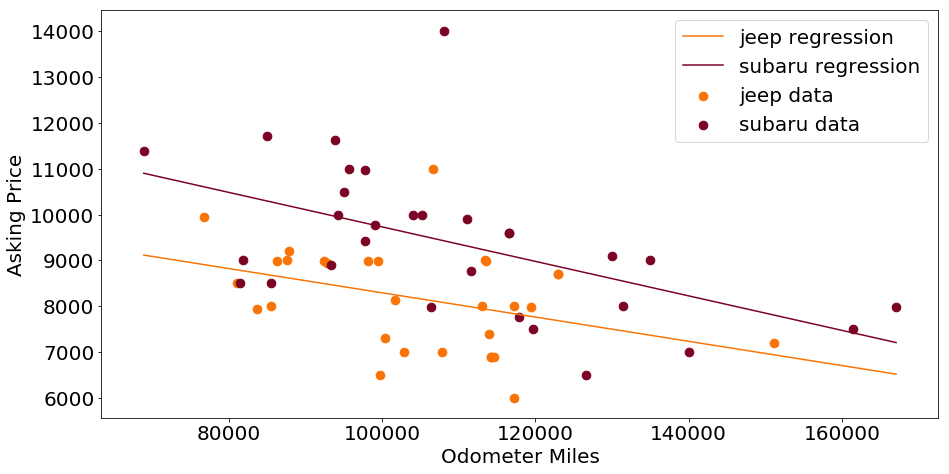

In [61]:
# fit a regression line to both jeep and subaru prices as a function of odometer miles. check for heteroskedasticity below
jeep_color, subaru_color = 'xkcd:orange', 'xkcd:wine red'

jeep_price_predicted = miles_driven*jeep_coeffs[1] + jeep_coeffs[0]
plt.plot(miles_driven, jeep_price_predicted, c=jeep_color, label='jeep regression')
plt.scatter(jeep_miles, jeep_price, c=jeep_color, s= 75, label='jeep data')

subaru_price_predicted = miles_driven*subaru_coeffs[1] + subaru_coeffs[0]
plt.plot(miles_driven, subaru_price_predicted, c=subaru_color, label='subaru regression')
plt.scatter(subaru_miles, subaru_price, c=subaru_color, s= 75, label='subaru data')

plt.xlabel('Odometer Miles')
plt.ylabel('Asking Price')
plt.legend()

plt.show()

## Check for Heteroskedasticity: Is a Linear Model *Really* the Right Fit?

In [62]:
# this code esentially 'tilts' and 'shifts' the entire regression graph so that the regression line becomes zero
# running parallel to x-axis, and the error bars maintain their distance from the regression line.
# the code also creates a set of all 'residuals,' or the distance of all the error bars.
jeep_predicted_value = ((jeep_coeffs[0]) + ((jeep_coeffs[1] * jeep_miles)))
jeep_true_value = jeep_price
jeep_price_residual = jeep_true_value - jeep_predicted_value

subaru_predicted_value = ((subaru_coeffs[0]) + ((subaru_coeffs[1] * subaru_miles)))
subaru_true_value = subaru_price
subaru_price_residual = subaru_true_value - subaru_predicted_value

Text(0.5, 1.0, 'visual check for heteroscedasticity')

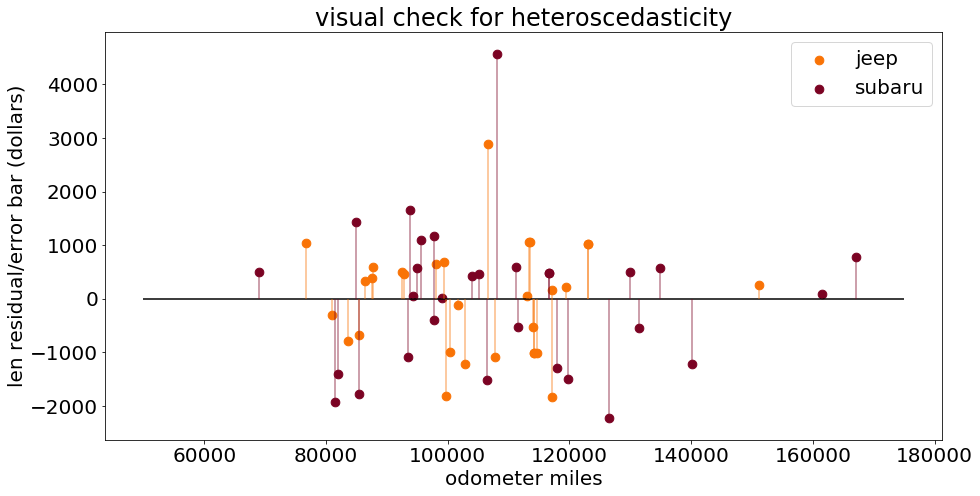

In [35]:
plt.hlines(0, 50000, 175000)

plt.scatter(jeep_miles, jeep_price_residual, c=jeep_color, s=75, label='jeep')
plt.vlines(jeep_miles, 0, jeep_price_residual, alpha = 0.5, color=jeep_color)

plt.scatter(subaru_miles, subaru_price_residual,c=subaru_color, s=75, label='subaru')
plt.vlines(subaru_miles, 0, subaru_price_residual, alpha = 0.5, color=subaru_color)

plt.legend()
plt.xlabel('odometer miles')
plt.ylabel('len residual/error bar (dollars)')
plt.title('visual check for heteroscedasticity')

Aside from two distinct outliers (Jeep: 10,995 dollars at 106,647 miles; Subaru: 13,998 dollars at 108,126 miles) and their consequential effects, the residuals maintain a relatively even and consistent spread. There is no clear development of deviation nor spreading on either side of the data. Thus, we choose to accept the linear fit.

## Basic Statistics

First, we should run through some basic statistics that allow us to compare and contrast the samples *subjectively*. There will be no turkey-trot TRQ tests here; just some plain old descriptive numbers and a statistician's bias.

In [104]:
# calculate the means for each car type's asking price
jeep_price_mean = jeep_price.mean()
subaru_price_mean = subaru_price.mean()

# calculate the means for each car type's mileage
jeep_miles_mean = jeep_miles.mean()
subaru_miles_mean = subaru_miles.mean()

print(jeep_price_mean,subaru_price_mean)
print(jeep_miles_mean,subaru_miles_mean)

8169.233333333334 9381.533333333333
104626.96666666666 109269.36666666667


In [34]:
# create arrays from these series
jeep_miles_array = np.array(jeep_miles)
subaru_miles_array = np.array(subaru_miles)
jeep_price_array = np.array(jeep_price)
subaru_price_array = np.array(subaru_price)

# calculate the *sample* standard deviations for reach car type's asking price
jeep_price_std = np.std(jeep_price_array, ddof=1)
subaru_price_std = np.std(subaru_price_array, ddof=1)

# calculate the *sample* standard deviations for each car type's mileage
jeep_miles_std = np.std(jeep_miles_array, ddof=1)
subaru_miles_std = np.std(subaru_miles_array, ddof=1)

print(jeep_price_std,subaru_price_std)
print(jeep_miles_std,subaru_miles_std)

1112.1946208792074 1618.6807470651959
16025.690597811428 22754.718200368046


### Summmary

As we can observe *subjectively*, there are clear differences between the statistics--specifically the asking prices--of both the 2008 Jeep Libertys and the 2008 Subaru Outbacks. The 2008 Jeep Libertys have a clearly lower mean asking price (\\$8,169.23) than the 2008 Subaru Outbacks (\\$9,381.53). There could be a lot of factors that feed into this, including the original MSRP value of the car.

Although the Jeeps have a lower asking price, they do have a significantly lower standard deviation (\\$1,112.20 as opposed to the Subarus' \\$1,618.68). So, although the Jeeps are put up for sale for less, it could be seen that their value retention may be more predictable and consistant than the Subarus'.

Yet, it feels like there is something we could do to test it. The Subarus do have a higher standard deviation of price, but they *also* have a higher standard deviation of milage. I wonder how the proportions of price std and mileage std compare against those of the Jeep...

In [33]:
# how to the jeep/subaru mean price proportions compare to the jeep/subaru mean mile proportions
price_mean_proportion = jeep_price_mean / subaru_price_mean
miles_mean_proportion = jeep_miles_mean / subaru_miles_mean

# how to the jeep/subaru std price proportions compare to the jeep/subaru std mile proportions
price_std_proportion = jeep_price_std / subaru_price_std
miles_std_proportion = jeep_miles_std / subaru_miles_std

print(price_mean_proportion,miles_mean_proportion)
print(price_std_proportion,miles_std_proportion)

0.8707780533388289 0.957514167587683
0.6870994313707071 0.7042798973248643


If we first focus in on the latter two proportions, we can see that the standard deviation proportions of jeep/subaru are extremely close between price std and mileage std. There is not enough evidence to make any extreme claims about this; the only thing I *know* I can conclude about this is: the fact that the Subarus have a larger standard deviation (wider spread) of price than the Jeeps *is not* because of some inherent factor in the car or the market, but can be explained almost entirely by the odometer differences that happened to come through on this sample. Thus, the evidence from this study contradicts my aforestatement that the Jeeps' "value retention may be more predictable and consistant than the Subarus'."

The former two proportions lead us to our next statistics; it is clear that the proportions of price (.87) and mileage (.95) are not the same, which means that one of the cars (the Subarus) are returning a higher price-per-mile.

## Other Statistics

So, if we feel comfortable applying a linear fit to the data, it seems reasonable to claim that we believe there is a (somewhat) linear relationship between the variables (*unsure wording because I am unsure in this assertion. what do you think?*). And, if we can assume a linear relationship, we can assume that price acts linearly in relationship to odometer reading.

In [64]:
# use the original car_data set to create a new df that displays how many dollars each car is worth according to its
# mileage. i.e. slope for value as a function of odometer reading

# create two series from original dataframe
jeep_dollars_mile = car_data['jeep_asking_price']/car_data['jeep_odometer_miles']
subaru_dollars_mile = car_data['subaru_asking_price']/car_data['subaru_odometer_miles']

# place series into dictionary then dataframe the dictionary
dollars_mile = {'subaru_dollars_mile': subaru_dollars_mile, 'jeep_dollars_mile': jeep_dollars_mile}
dollars_mile_df = pd.DataFrame(dollars_mile)
dollars_mile_df

,subaru_dollars_mile,jeep_dollars_mile
0,0.089074,0.079375
1,0.095019,0.064922
2,0.137887,0.047588
3,0.112288,0.068252
4,0.098709,0.080023
5,0.129460,0.104803
6,0.049929,0.091659
7,0.114961,0.103097
8,0.096085,0.104094
9,0.065843,0.068022


In [70]:
# find the average of both columns
jeep_dollars_mile_mean = dollars_mile_df['jeep_dollars_mile'].mean()
subaru_dollars_mile_mean = dollars_mile_df['subaru_dollars_mile'].mean()

print(jeep_dollars_mile_mean)
print(subaru_dollars_mile_mean)

0.08048478035458503
0.09080583824568508


Maybe now we can:
* find standard deviations of these means? would this be helpful?
* compare MSRPs and mean prices of both cars
    * compare standard deviations of the mean prices of each car. what does this tell us about consistency?
* percentage of decline from original MSRP
* etc. etc. etc.

In [34]:
pd.DataFrame?

Init signature: pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
Docstring:     
Two-dimensional size-mutable, potentially heterogeneous tabular data
structure with labeled axes (rows and columns). Arithmetic operations
align on both row and column labels. Can be thought of as a dict-like
container for Series objects. The primary pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, or list-like objects

    .. versionchanged :: 0.23.0
       If data is a dict, argument order is maintained for Python 3.6
       and later.

index : Index or array-like
    Index to use for resulting frame. Will default to RangeIndex if
    no indexing information part of input data and no index provided
columns : Index or array-like
    Column labels to use for resulting frame. Will default to
    RangeIndex (0, 1, 2, ..., n) if no column labels are provided
dtype : dt

# Normal Distributions

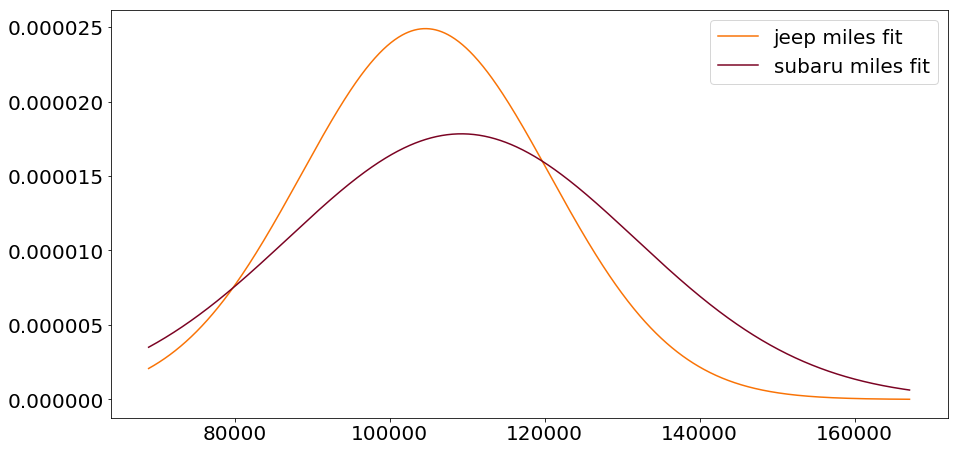

In [61]:
jeep_normal_dist_miles = dist.norm(loc=jeep_miles.mean(), scale=jeep_miles.std() )
subaru_normal_dist_miles = dist.norm(loc=subaru_miles.mean(), scale=subaru_miles.std() )

plt.plot(miles_driven, jeep_normal_dist_miles.pdf(miles_driven), label='jeep miles fit', c=jeep_color)
plt.plot(miles_driven, subaru_normal_dist_miles.pdf(miles_driven), label='subaru miles fit', c=subaru_color)
plt.legend()
plt.show()

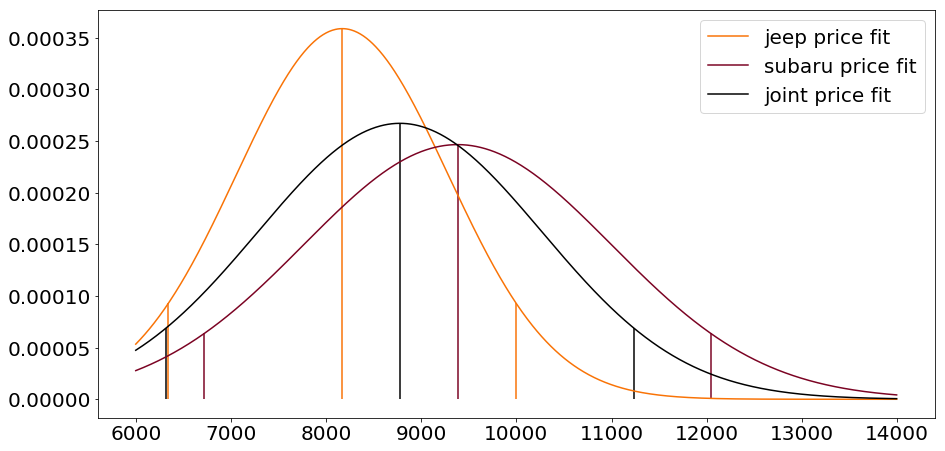

In [67]:
# plot three normal distributions, depicting the normal fit of jeep price, subaru price, and joint price
# plot each distribution with vertical lines marking its respective mean and p-values
jeep_normal_dist_price = dist.norm(loc=jeep_price.mean(), scale=jeep_price.std() )
subaru_normal_dist_price = dist.norm(loc=subaru_price.mean(), scale=subaru_price.std() )
joint_normal_dist_price = dist.norm(loc=prices.mean(), scale=prices.std() )

plot_resolution = 1000
mn, mx = np.min(prices), np.max(prices)
dollars = np.linspace(mn, mx, plot_resolution)

# elect a 0.1 alpha and later plot lines at these p-values
alpha = 0.1
jeep_confidence_interval = jeep_normal_dist_price.interval(1-alpha)
subaru_confidence_interval = subaru_normal_dist_price.interval(1-alpha)
joint_confidence_interval = joint_normal_dist_price.interval(1-alpha)

jeep_price_pred = jeep_normal_dist_price.pdf(dollars)
subaru_price_pred = subaru_normal_dist_price.pdf(dollars)
joint_price_pred = joint_normal_dist_price.pdf(dollars)

plt.plot(dollars, jeep_price_pred, label='jeep price fit', c=jeep_color)
plt.plot(dollars, subaru_price_pred, label='subaru price fit', c=subaru_color)
plt.plot(dollars, joint_normal_dist_price.pdf(dollars), label='joint price fit', c='k')


for i in range(2):
    plt.vlines(jeep_confidence_interval[i], 0, jeep_normal_dist_price.pdf(jeep_confidence_interval[i]), color=jeep_color)
    plt.vlines(subaru_confidence_interval[i], 0, subaru_normal_dist_price.pdf(subaru_confidence_interval[i]),  color=subaru_color)
    plt.vlines(joint_confidence_interval[i], 0, joint_normal_dist_price.pdf(joint_confidence_interval[i]))

jeep_normal_dist_price_mean = jeep_normal_dist_price.mean()
subaru_normal_dist_price_mean = subaru_normal_dist_price.mean()
joint_normal_dist_price_mean = joint_normal_dist_price.mean()

plt.vlines(jeep_normal_dist_price_mean, 0, jeep_normal_dist_price.pdf(jeep_normal_dist_price_mean), color=jeep_color)
plt.vlines(subaru_normal_dist_price_mean, 0, subaru_normal_dist_price.pdf(subaru_normal_dist_price_mean),  color=subaru_color)
plt.vlines(joint_normal_dist_price_mean, 0, joint_normal_dist_price.pdf(joint_normal_dist_price_mean))
plt.legend()
plt.show()

- shapiro failed to reject possibility of normality. it's possible our samples came from normals.
- so let's fit normal distributions. 
- these can now be treated kind of like approximated "populations" to sample from.

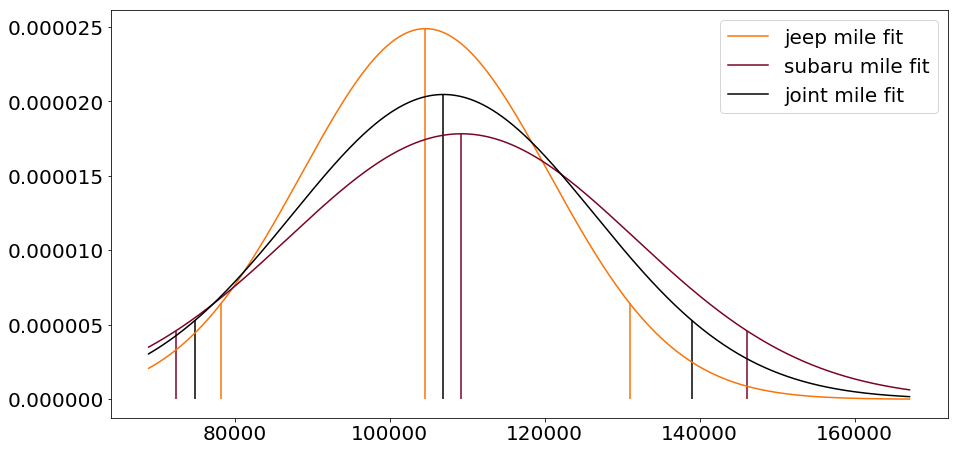

In [72]:
# plot three normal distributions, depicting the normal fit of jeep miles, subaru miles, and joint miles
# plot each distribution with vertical lines marking its respective mean and p-values
jeep_normal_dist_mile = dist.norm(loc=jeep_miles.mean(), scale=jeep_miles.std() )
subaru_normal_dist_mile = dist.norm(loc=subaru_miles.mean(), scale=subaru_miles.std() )
joint_normal_dist_mile = dist.norm(loc=miles.mean(), scale=miles.std() )

plot_resolution = 1000
mn, mx = np.min(miles), np.max(miles)
dollars = np.linspace(mn, mx, plot_resolution)

# elect a 0.1 alpha and later plot lines at these p-values
alpha = 0.1
jeep_confidence_interval = jeep_normal_dist_mile.interval(1-alpha)
subaru_confidence_interval = subaru_normal_dist_mile.interval(1-alpha)
joint_confidence_interval = joint_normal_dist_mile.interval(1-alpha)

jeep_mile_pred = jeep_normal_dist_mile.pdf(dollars)
subaru_mile_pred = subaru_normal_dist_mile.pdf(dollars)
joint_mile_pred = joint_normal_dist_mile.pdf(dollars)

plt.plot(dollars, jeep_mile_pred, label='jeep mile fit', c=jeep_color)
plt.plot(dollars, subaru_mile_pred, label='subaru mile fit', c=subaru_color)
plt.plot(dollars, joint_normal_dist_mile.pdf(dollars), label='joint mile fit', c='k')


for i in range(2):
    plt.vlines(jeep_confidence_interval[i], 0, jeep_normal_dist_mile.pdf(jeep_confidence_interval[i]), color=jeep_color)
    plt.vlines(subaru_confidence_interval[i], 0, subaru_normal_dist_mile.pdf(subaru_confidence_interval[i]),  color=subaru_color)
    plt.vlines(joint_confidence_interval[i], 0, joint_normal_dist_mile.pdf(joint_confidence_interval[i]))

# assign means for each dataset/distribution
jeep_normal_dist_mile_mean = jeep_normal_dist_mile.mean()
subaru_normal_dist_mile_mean = subaru_normal_dist_mile.mean()
joint_normal_dist_mile_mean = joint_normal_dist_mile.mean()

# plot vertical lines at mean and p-values for each distribution accoring to variables assigned above
plt.vlines(jeep_normal_dist_mile_mean, 0, jeep_normal_dist_mile.pdf(jeep_normal_dist_mile_mean), color=jeep_color)
plt.vlines(subaru_normal_dist_mile_mean, 0, subaru_normal_dist_mile.pdf(subaru_normal_dist_mile_mean),  color=subaru_color)
plt.vlines(joint_normal_dist_mile_mean, 0, joint_normal_dist_mile.pdf(joint_normal_dist_mile_mean))
plt.legend()
plt.show()

# Other Stats
## 

In [74]:
B = dist.norm(*dist.norm.fit(subaru_miles))

(0, 3e-05)

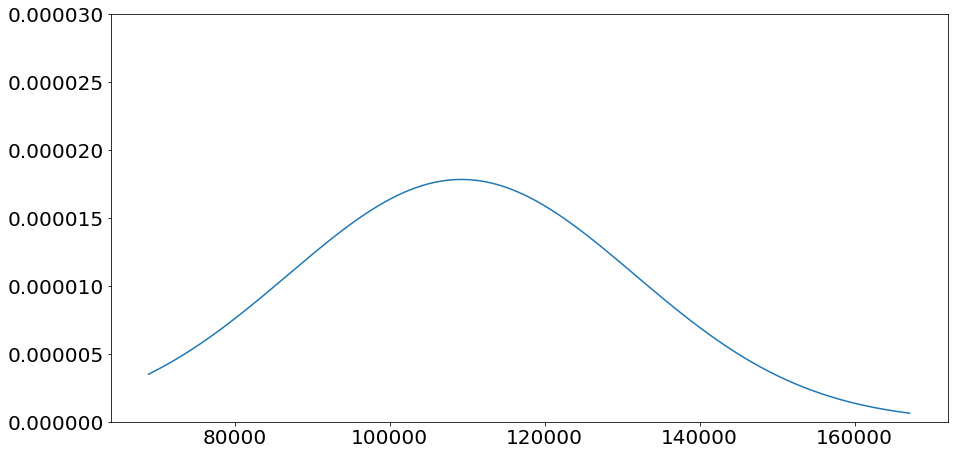

In [75]:
plt.plot(miles_driven, B.pdf(miles_driven))
plt.ylim(0,0.00003)

In [76]:
B.mean(), B.std()

(109269.36666666667, 22372.25872292638)

In [77]:
jeep_miles.std()

16025.690597811428

In [78]:
joint_normal_dist_price = dist.norm(loc=prices.mean(), scale=prices.std() )
joint_normal_dist_price.interval(0.95)

(5847.42747167762, 11703.339194989047)

In [79]:
import scipy.stats


In [80]:
scipy.stats.ttest_ind(subaru_price, jeep_price, equal_var=False)

Ttest_indResult(statistic=3.3809600940166527, pvalue=0.001386882150564184)

now let's test our fitted distributions, generating larger sample sizes from them.
(artificial data set!!)

this is simulating new cars from each distribution

In [57]:
scipy.stats.ttest_ind(subaru_normal_dist_price.rvs(30), jeep_normal_dist_price.rvs(30), equal_var=False)

Ttest_indResult(statistic=2.0683221279596475, pvalue=0.04317595282188859)

In [33]:
a = np.random.randn(20)
b = np.random.randn(20) + 3
scipy.stats.ttest_ind(a, b)

Ttest_indResult(statistic=-9.231389395571869, pvalue=3.0032037741812606e-11)

In [58]:
scipy.stats.ttest_ind(subaru_miles, jeep_miles, equal_var=False)

Ttest_indResult(statistic=0.9136175845923031, pvalue=0.3651275291733391)

In [35]:
subaru_price.std(), jeep_price.std()

(1618.6807470651959, 1112.1946208792074)

In [93]:
scipy.stats.ttest_ind

<function scipy.stats.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')>

In [45]:
scipy.stats.shapiro(subaru_price), scipy.stats.shapiro(jeep_price)

((0.9688223004341125, 0.5074750185012817),
 (0.9534995555877686, 0.2095884382724762))

p>0.05, so we fail to reject the null hypothesis.
The null hypothesis was that prices are normally distributed.


## Normal

In [46]:
scipy.stats.shapiro(subaru_miles), scipy.stats.shapiro(jeep_miles)
# fail to reject null hypothesis. it is possible that these are normally distributed

((0.9529148936271667, 0.20222873985767365),
 (0.9476072192192078, 0.1458173245191574))

## Not normal

In [39]:
scipy.stats.shapiro(np.random.rand(100)) # rejecting null hypothesis bc samples are uniform

(0.9465398788452148, 0.000494321109727025)

In [94]:
dist.t

In [43]:
scipy.stats.shapiro(subaru_price_residual), scipy.stats.shapiro(jeep_price_residual)

((0.9085631966590881, 0.013691679574549198),
 (0.9505169987678528, 0.17453503608703613))

According to the Wilk Shapiro test, whose null hypothesis states that the data could be normal, subarus reject the null (implying possible heteroscedasticity), while jeeps fail to reject the null (implying less factor-dependent variation)

# Now, an attempt at exponential line fitting

In [44]:
def exponential_regression(x,p1,p2):
  return p1*np.log(x)+p2

popt, pcov = scipy.optimize.least_squares(exponential_regression, subaru_miles, subaru_price)

/Users/djdebonis/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [45]:
p1 = popt[0]
p2 = popt[1]


plt.scatter(subaru_miles, subaru_price)
curvex=np.linspace(70000,175000, 1000)
curvey=exponential_regression(curvex,p1,p2)
plt.plot(curvex,curvey,'r', linewidth=3)

NameError: name 'popt' is not defined

In [46]:
print(p1,p2)

NameError: name 'p1' is not defined

In [47]:

scipy.optimize?

Type:        module
String form: <module 'scipy.optimize' from '/Users/djdebonis/anaconda3/lib/python3.7/site-packages/scipy/optimize/__init__.py'>
File:        ~/anaconda3/lib/python3.7/site-packages/scipy/optimize/__init__.py
Docstring:  
Optimization and Root Finding (:mod:`scipy.optimize`)

.. currentmodule:: scipy.optimize

SciPy ``optimize`` provides functions for minimizing (or maximizing)
objective functions, possibly subject to constraints. It includes
solvers for nonlinear problems (with support for both local and global
optimization algorithms), linear programing,  constrained
and nonlinear least-squares, root finding and curve fitting.

Common functions and objects, shared across different solvers, are:

.. autosummary::
   :toctree: generated/

   show_options - Show specific options optimization solvers.
   OptimizeResult - The optimization result returned by some optimizers.
   OptimizeWarning - The optimization encountered problems.


Optimization

Scalar Functions Opti